# ** BÁSICO DE PYTHON **

Falar sobre a linguagem...

### Variavel

 

In [175]:
nome = "uender"

In [176]:
nome

'uender'

In [177]:
idade = 31

### Função



In [ ]:
def soma(idade):
  print("estamos dentro da função")
  return idade + 1

In [ ]:
soma(1)

estamos dentro da função


2

### Lista ou array



In [1]:
aluno1 = "Luciana"
aluno2 = "Roberto"
aluno3 = "Maria"

alunos = ["Luciana", "Roberto", "Maria"]

### Laço de repetição 



In [2]:
for aluno in alunos:
  print(aluno)
  print("....")
print("estamos fora do laço")

Luciana
....
Roberto
....
Maria
....
estamos fora do laço


### Dicionário ou objeto



In [3]:
dados_alunos = {"nome":"Roberto", "disciplina": "matematica", "nota": "8.5"}

In [5]:
dados_alunos ["nota"]

'8.5'

# ** AVANÇADO DE PYTHON **

MACHINE LEARNING

## Trabalhando com Pipelines do scikit-learn



Em projetos de ciência de dados visando a construção de modelos de *machine learning*, ou aprendizado estatístico, é muito incomum que os dados iniciais estejam já no formato ideal para a construção de modelos. São necessários vários passos intermediários de pré-processamento de dados, como por exemplo a codificação de variáveis categóricas, normalização de variáveis numéricas, tratamento de dados faltantes, etc. A biblioteca **scikit-learn** -- uma das mais populares bibliotecas de código-aberto para *machine learning* no mundo -- possui diversas funções já integradas para a realização das transformações de dados mais utilizadas. Entretanto, em um fluxo comum de um modelo de aprendizado de máquina, é necessária a aplicação dessas transformações pelo menos duas vezes: a primeira vez para "treinar" o modelo, e depois novamente quando novos dados forem enviados como entrada para serem classificados por este modelo. 


In [6]:
# Primeiro, realizamos a instalação do scikit-learn 
#XGBoost implementa algoritmos de aprendizado de máquina sob a estrutura Gradient Boosting
!pip install scikit-learn==0.20.3 --upgrade
!pip install xgboost==0.71 --upgrade

     |████████████████████████████████| 5.4MB 4.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 501kB 5.6MB/s 
  Created wheel for xgboost: filename=xgboost-0.71-cp36-cp36m-linux_x86_64.whl size=1957196 sha256=97503d59be6168435e8b49bdbfccf072b230e314d46bf3cc2e7a7488d2f9d432
  Stored in directory: /root/.cache/pip/wheels/4e/6d/1d/0bc23240225fe411315d8abb5d4521b9ff002493ff77515ccc
Successfully built xgboost
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


## Import Bibliotecas


In [7]:
#@title
# Em seguida iremos importar diversas bibliotecas que serão utilizadas:

# Pacote para trabalhar com JSON
import json

# Pacote para realizar requisições HTTP
import requests

# Pacote para exploração e análise de dados
import pandas as pd

# Pacote com métodos numéricos e representações matriciais
import numpy as np

# Pacote para construção de modelo baseado na técnica Gradient Boosting
import xgboost as xgb

# Pacotes do scikit-learn para pré-processamento de dados
# "SimpleImputer" é uma transformação para preencher valores faltantes em conjuntos de dados
from sklearn.impute import SimpleImputer

# Pacotes do scikit-learn para treinamento de modelos e construção de pipelines
# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split

# Método para criação de modelos baseados em árvores de decisão
from sklearn.tree import DecisionTreeClassifier

# Classe para a criação de uma pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Pacotes do scikit-learn para avaliação de modelos
# Métodos para validação cruzada do modelo criado
from sklearn.model_selection import KFold, cross_validate

In [8]:
# FAZER DOWNLOAD DO DATASET NO GITHUB
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/uendercarlos/dataset_aprovado/master/dataset_alunos.csv
df_data_1 = pd.read_csv(r'dataset_alunos.csv')
df_data_1.tail()

--2020-11-23 18:07:57--  https://raw.githubusercontent.com/uendercarlos/dataset_aprovado/master/dataset_alunos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308815 (302K) [text/plain]
Saving to: ‘dataset_alunos.csv’

dataset_alunos.csv  100%[===================>] 301.58K  --.-KB/s    in 0.04s   

2020-11-23 18:07:57 (7.46 MB/s) - ‘dataset_alunos.csv’ saved [308815/308815]



,NOME,AUSENCIA,MATEMATICA,PORTUGUES,BIOLOGIA,RESULTADO
6275,Damares Alessandra Ioer,1,6.1,6.7,6.2,APROVADO
6276,Amarildo Oséas Mercado,1,6.1,6.2,7.4,APROVADO
6277,Oliver Juan Groppasye Thesheman,1,6.0,7.6,7.5,APROVADO
6278,Nelson Táles de Simões,1,6.0,6.7,6.4,APROVADO
6279,Wilson Maurício de Queiroz Dysisier,1,8.0,7.9,10.0,REPROVADO


In [158]:
#LENDO ARQUIVO DATASET
df_data_1 = pd.read_csv("dataset_alunos8.csv")

## Explorando os dados fornecidos



Podemos continuar a exploração dos dados fornecidos com a função ``info()``:

In [138]:
df_data_1.head(15)

,NOME,AUSENCIA,MATEMATICA,PORTUGUES,BIOLOGIA,RESULTADO
0,Bento Suyov d'Ávila de França,26.0,7.0,6.8,8.4,REPROVADO
1,Valeska Irelope,26.0,6.7,7.0,7.3,REPROVADO
2,Sara Gomes Klein Duque,25.0,7.5,8.1,8.3,REPROVADO
3,Décio Rosatto Guedes,25.0,7.3,6.9,8.0,REPROVADO
4,Elisete Anbiman,25.0,6.9,7.1,6.0,REPROVADO
5,Manuel de Moreira da Silva Terceiro,24.0,7.6,8.1,8.4,REPROVADO
6,José Lúcio de Barbosa Secokial Onaov,24.0,7.2,6.8,8.2,REPROVADO
7,Jânio Táles Omfralão,24.0,6.6,6.1,6.0,REPROVADO
8,Jonathas Caio Wani,23.0,7.9,8.0,8.9,REPROVADO
9,Ivan Penedo de Oliveira Tama,23.0,7.5,7.4,7.9,REPROVADO


In [123]:
df_data_1.shape

(6536, 6)

In [141]:
#Imprima um resumo conciso de um DataSET
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NOME        6536 non-null   object 
 1   AUSENCIA    6535 non-null   float64
 2   MATEMATICA  6530 non-null   float64
 3   PORTUGUES   6535 non-null   float64
 4   BIOLOGIA    6532 non-null   float64
 5   RESULTADO   6536 non-null   object 
dtypes: float64(4), object(2)
memory usage: 306.5+ KB


In [156]:
#Conte observações distintas sobre o eixo solicitado.
df_data_1.nunique()

NOME          6233
AUSENCIA        24
MATEMATICA      37
PORTUGUES       54
BIOLOGIA        57
RESULTADO        2
dtype: int64

In [159]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_data_1 antes da transformação DropNA: \n\n{}\n".format(df_data_1.isnull().sum(axis = 0)))

Valores nulos no df_data_1 antes da transformação DropNA: 

NOME          0
AUSENCIA      1
MATEMATICA    6
PORTUGUES     1
BIOLOGIA      4
RESULTADO     0
dtype: int64



## Transformação: 

Para o pré-processamento dos dados serão apresentadas duas transformações básicas neste notebook, demonstrando a construção de uma Pipeline com um modelo funcional. Esta Pipeline funcional fornecida deverá ser melhorada pelo participante para que o modelo final alcance a maior acurácia possíveL. Essa melhoria pode ser feita apenas no pré-processamento dos dados.

A primeira transformação (passo na nossa Pipeline) será a exclusão da coluna "NOME" do nosso dataset, que além de não ser uma variável numérica, também não é uma variável relacionada ao desempenho dos estudantes nas disciplinas. Existem funções prontas no scikit-learn para a realização dessa transformação, entretanto nosso exemplo irá demonstrar como criar uma transformação personalizada do zero no scikit-learn.


### Removendo todas as linhas que possuem algum valor nulos em determinadas colunas 
Usando o método Pandas **DataFrame.dropna()** você pode remover todas as linhas nulas do dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [160]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_data_1 antes da transformação DropNA: \n\n{}\n".format(df_data_1.isnull().sum(axis = 0)))

Valores nulos no df_data_1 antes da transformação DropNA: 

NOME          0
AUSENCIA      1
MATEMATICA    6
PORTUGUES     1
BIOLOGIA      4
RESULTADO     0
dtype: int64



In [134]:
# Aplicando a função para deletar todas as linhas com valor NaN na coluna ``AUSENCIA'', ``MATEMATICA'', ``PORTUGUES'', ``BIOLOGIA'':
df_data_1 = df_data_1.dropna(axis='index', how='any', subset=['AUSENCIA', 'MATEMATICA', 'PORTUGUES', 'BIOLOGIA'])

In [135]:
# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_data_1 após a transformação DropNA: \n\n{}\n".format(df_data_1.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação DropNA: 

NOME          0
AUSENCIA      0
MATEMATICA    0
PORTUGUES     0
BIOLOGIA      0
RESULTADO     0
dtype: int64



In [136]:
df_data_1.shape

(6526, 6)

### Converter tipos de dados


In [154]:
 df_data_1.dtypes

NOME           object
AUSENCIA        int64
MATEMATICA    float64
PORTUGUES     float64
BIOLOGIA      float64
RESULTADO      object
dtype: object

In [152]:
df_data_1["AUSENCIA"] = df_data_1["AUSENCIA"].astype(int)


In [153]:
 #Isso retorna uma série com o tipo de dados de cada coluna. 
 df_data_1.dtypes

NOME           object
AUSENCIA        int64
MATEMATICA    float64
PORTUGUES     float64
BIOLOGIA      float64
RESULTADO      object
dtype: object

In [ ]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_data_1.isnull().sum(axis = 0)))

### Excluindo colunas do dataset

Para a criação de uma transformação de dados personalizada no scikit-learn, é necessária basicamente a criação de uma classe com os métodos ``transform`` e ``fit``. No método transform será executada a lógica da nossa transformação.

Na próxima célula é apresentado o código completo de uma transformação ``DropColumns`` para a remoção de colunas de um DataFrame pandas.

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin


# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        # Retornamos um novo dataframe sem as colunas indesejadas
        return data.drop(labels=self.columns, axis='columns')

Para aplicar essa transformação em um DataFrame pandas, basta instanciar um objeto *DropColumns* e chamar o método transform().

In [100]:
# Instanciando uma transformação DropColumns
rm_columns = DropColumns(
    columns=["NOME"]  # Essa transformação recebe como parâmetro uma lista com os nomes das colunas indesejadas
)

print(rm_columns)

DropColumns(columns=['NOME'])


In [101]:
# Visualizando as colunas do dataset original
print("Colunas do dataset original: \n")
print(df_data_1.columns)

Colunas do dataset original: 

Index(['NOME', 'AUSENCIA', 'MATEMATICA', 'PORTUGUES', 'BIOLOGIA', 'RESULTADO'], dtype='object')


In [102]:
# Aplicando a transformação ``DropColumns`` ao conjunto de dados base
rm_columns.fit(X=df_data_1)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_data_1
    ),
)

In [103]:
# Visualizando as colunas do dataset transformado
print("Colunas do dataset após a transformação ``DropColumns``: \n")
print(df_data_2.columns)

Colunas do dataset após a transformação ``DropColumns``: 

Index(['AUSENCIA', 'MATEMATICA', 'PORTUGUES', 'BIOLOGIA', 'RESULTADO'], dtype='object')


In [106]:
# df_DATA_1 AINDA POSSUI NOME
df_data_2.head(7)

,AUSENCIA,MATEMATICA,PORTUGUES,BIOLOGIA,RESULTADO
0,26,7.0,6.8,8.4,REPROVADO
1,26,6.0,7.0,7.3,REPROVADO
2,25,7.0,8.1,8.3,REPROVADO
3,25,7.0,6.9,8.0,REPROVADO
4,25,6.0,7.1,6.0,REPROVADO
5,24,7.0,8.1,8.4,REPROVADO
6,24,7.0,6.8,8.2,REPROVADO


Nota-se que a coluna "NOME" foi removida e nosso dataset agora poossui apenas 5 colunas.

### Renomear coluna

In [161]:
# renomear coluna
df_data_2 = df_data_2.rename(columns={'AUSENCIA': 'FALTAS'})
#ou
#df.rename(columns={'nome': 'nome_completo'}, inplace = True)

## Visualizações

Para visualizar o dataset fornecido, podemos utilizar as bibliotecas ``matplotlib`` e ``seaborn``:


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

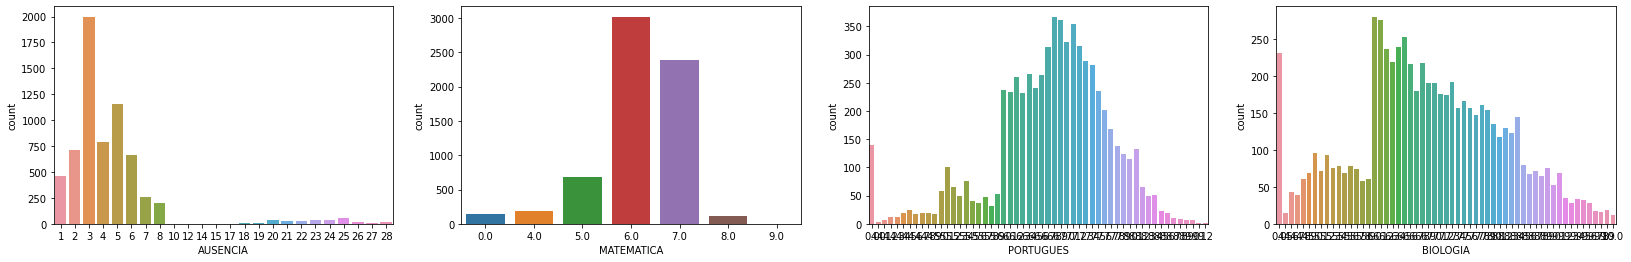

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='AUSENCIA', data=df_data_1)
sns.countplot(ax=axes[1], x='MATEMATICA', data=df_data_1)
sns.countplot(ax=axes[2], x='PORTUGUES', data=df_data_1)
sns.countplot(ax=axes[3], x='BIOLOGIA', data=df_data_1)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

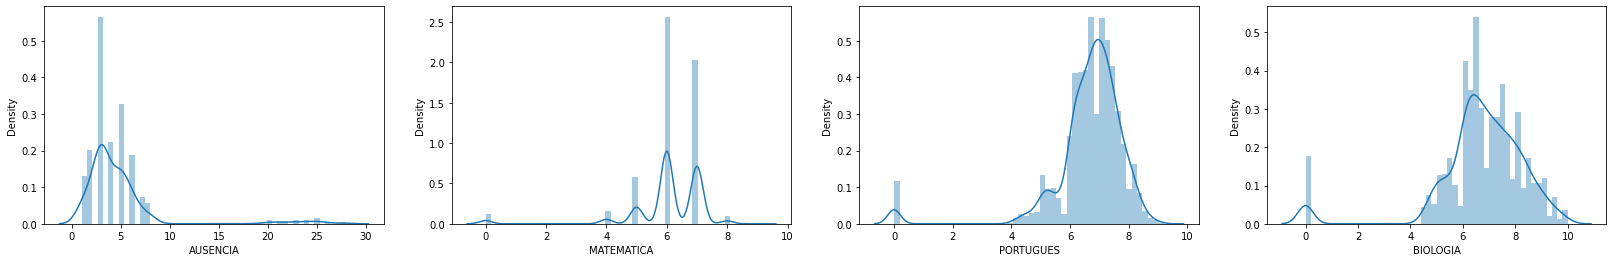

In [95]:
#Gere o gráfico de estimativa de densidade do kernel
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.distplot(df_data_1['AUSENCIA'].dropna(), ax=axes[0])
sns.distplot(df_data_1['MATEMATICA'], ax=axes[1])
sns.distplot(df_data_1['PORTUGUES'], ax=axes[2])
sns.distplot(df_data_1['BIOLOGIA'], ax=axes[3])


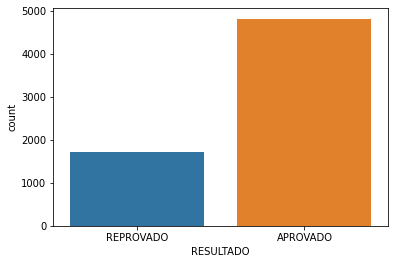

In [96]:
fig = plt.plot()
sns.countplot(x='RESULTADO', data=df_data_1)

## Treinando um modelo de classificação

### Definindo as features do modelo

In [162]:
# Definição das colunas que serão features (nota-se que a coluna NOME não está presente)
features = [
    "FALTAS", "MATEMATICA", 'PORTUGUES', 'BIOLOGIA', 
]

# Definição da variável-alvo
target = ["RESULTADO"]

# Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``
X = df_data_2[features]
y = df_data_2[target]

O conjunto de entrada (X):

In [163]:
X.head()

,FALTAS,MATEMATICA,PORTUGUES,BIOLOGIA
0,26,7.0,6.8,8.4
1,26,6.0,7.0,7.3
2,25,7.0,8.1,8.3
3,25,7.0,6.9,8.0
4,25,6.0,7.1,6.0


As variáveis-alvo correspondentes (y):

In [164]:
y.head()

,RESULTADO
0,REPROVADO
1,REPROVADO
2,REPROVADO
3,REPROVADO
4,REPROVADO


### Separando o dataset em um conjunto de treino e um conjunto de teste

Iremos separar o dataset fornecido em dois grupos: um para treinar nosso modelo, e outro para testarmos o resultado através de um teste cego. A separação do dataset pode ser feita facilmente com o método *train_test_split()* do scikit-learn:

In [165]:
# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337)

<hr>

### Criando um modelo baseado em árvores de decisão

No exemplo fornecido iremos criar um classificador baseado em **árvores de decisão**.

Material teórico sobre árvores de decisão na documentação oficial do scikit-learn: https://scikit-learn.org/stable/modules/tree.html

O primeiro passo é basicamente instanciar um objeto *DecisionTreeClassifier()* da biblioteca scikit-learn.

In [166]:
# Criação de uma árvore de decisão com a biblioteca ``scikit-learn``:
decision_tree = DecisionTreeClassifier()

### Testando o classificador baseado em árvore de decisão

In [167]:
# Treino do modelo (é chamado o método *fit()* com os conjuntos de treino)
decision_tree.fit(
    X_train,
    y_train
)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Execução de predições e avaliação da árvore de decisão

In [168]:
# Realização de teste cego no modelo criado
y_pred = decision_tree.predict(X_test)

In [169]:
X_test.head()

,FALTAS,MATEMATICA,PORTUGUES,BIOLOGIA
635,6,6.0,7.0,5.5
1954,6,7.0,6.9,6.0
2284,6,6.0,6.0,6.3
869,5,6.0,5.8,5.5
3777,3,7.0,7.3,6.4


In [170]:
print(y_pred)

['REPROVADO' 'APROVADO' 'APROVADO' ... 'APROVADO' 'APROVADO' 'REPROVADO']


In [171]:
from sklearn.metrics import accuracy_score

# Acurácia alcançada pela árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

Acurácia: 100.0%


### Testar modelo em uma matriz de confusao

In [172]:
# matriz de confusão é para avaliar a qualidade da saída do nosso classificador
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

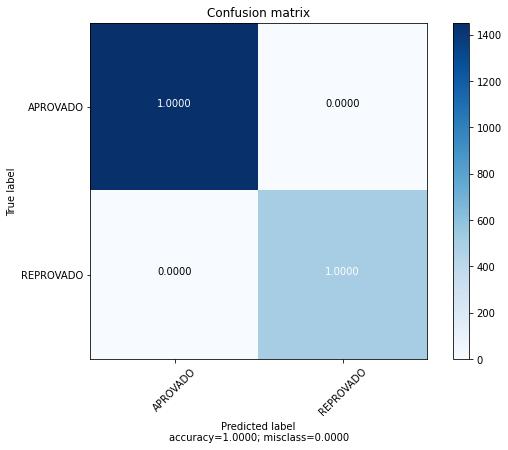

In [174]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['APROVADO', 'REPROVADO'])

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
from google.colab import files
df_data_2.to_csv('dataset_alunos.csv') 
files.download('dataset_alunos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<hr>

Neste notebook foi demonstrado como trabalhar com transformações e modelos com a biblioteca scikit-learn. É recomendado que o participante realize seus experimentos editando o código fornecido aqui até que um modelo com acurácia elevada seja alcançado.

Quando você estiver satisfeito com seu modelo, pode passar para a segunda etapa do desafio -- encapsular seu modelo como uma API REST pronta para uso em uma ferramenta Machine Learning!

